In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
motor = pd.read_csv("temperature_data.csv")

In [3]:
motor.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [4]:
min_thershold,max_thershold=motor["pm"].quantile([0.1,0.99])
min_thershold,max_thershold

(-1.44353463, 2.000968372999993)

In [5]:
motor=motor[(motor["pm"]>min_thershold) & (motor["pm"]<max_thershold)]
motor.shape

(888282, 13)

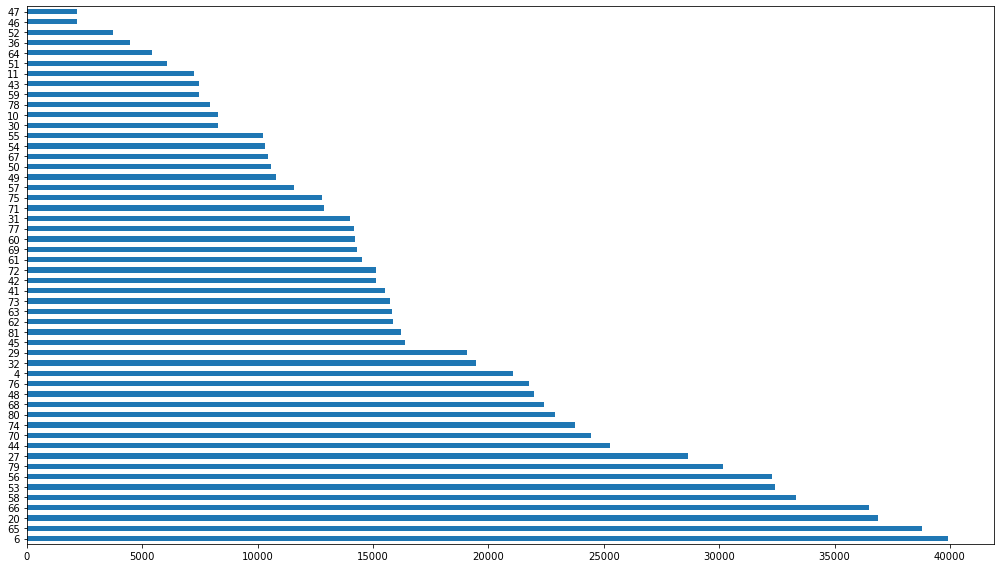

In [6]:
plt.figure(figsize=(14,8)) 
motor.profile_id.value_counts().sort_values(ascending=False).plot(kind="barh")
plt.tight_layout()

In [7]:
motor.drop("profile_id",axis=1,inplace=True)

In [8]:
motor.corr()[motor.corr()>0.90]


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coolant,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u_d,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
u_q,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor_speed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
torque,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.996419,NaN,NaN,NaN,NaN
i_d,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
i_q,NaN,NaN,NaN,NaN,NaN,0.996419,NaN,1.000000,NaN,NaN,NaN,NaN
pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
stator_yoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.943327,NaN


In [9]:
motor.drop(["torque","stator_tooth","stator_winding"],axis=1,inplace=True)

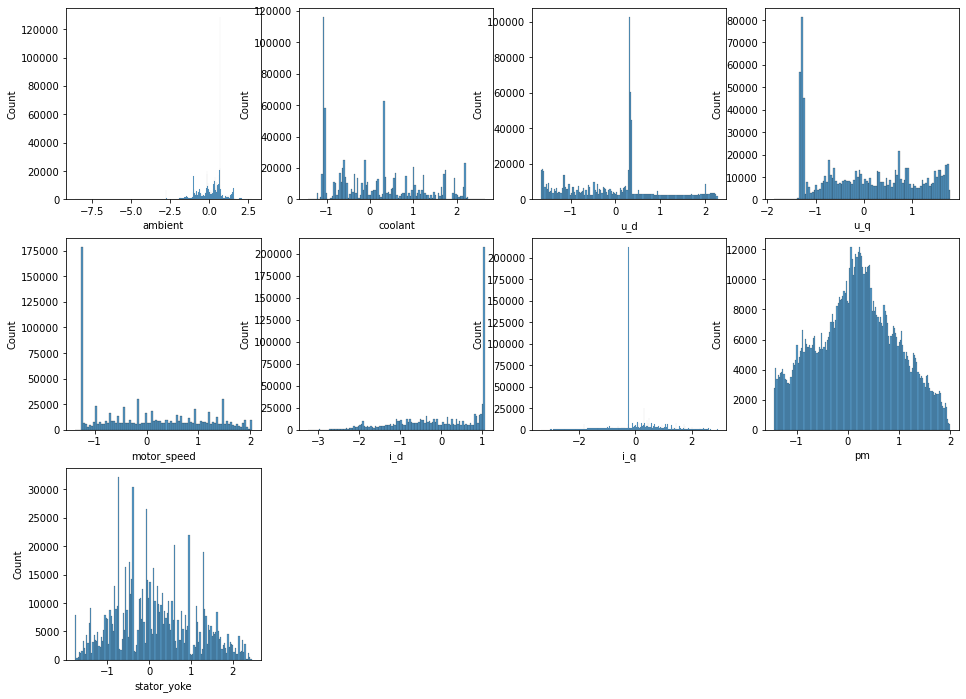

In [10]:
plt.figure(figsize=(16,12))
for i in range(len(motor.columns)):
    plt.subplot(3,4,i+1)
    sns.histplot(motor[motor.columns[i]])
plt.show()

In [11]:
motor.corr()["pm"].sort_values()

i_d           -0.271490
i_q           -0.069138
u_d           -0.046896
u_q            0.094685
motor_speed    0.279697
ambient        0.357896
coolant        0.378699
stator_yoke    0.635456
pm             1.000000
Name: pm, dtype: float64

In [12]:
X=motor.drop("pm",axis=1)
y=motor["pm"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
test_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
rmse_lr = np.sqrt(MSE)

<AxesSubplot:xlabel='pm'>

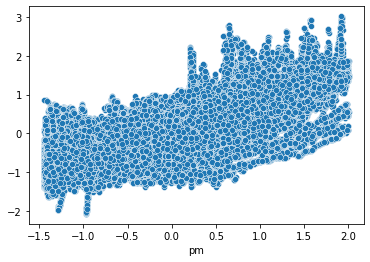

In [21]:
sns.scatterplot(x=y_test, y=test_pred) 


In [22]:
MAE

0.3637990976720936

In [23]:
rmse_lr

0.47128664153734046

In [24]:
abs(motor['pm']).mean()

0.658548340859698

In [25]:
r2_lr=r2_score(y_test,test_pred)
r2_lr

0.6422352448122854

The lr model can explain 65.69% of variation in the dataset.


# Let's plot out residuals and check for normal distribution as this helps us understand if Linear Regression was a valid model choice.

In [26]:
test_residuals = y_test - test_pred

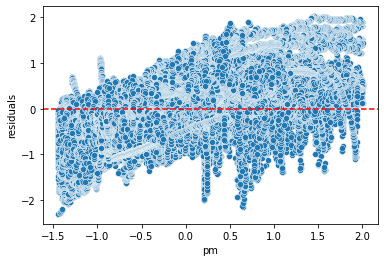

In [27]:
sns.scatterplot(x=motor["pm"],y=test_residuals)
plt.xlabel("pm")
plt.ylabel("residuals")
plt.axhline(y=0, color='r', linestyle='--')

As we can see thst there is heteroescacidity present in the plot .
We will transfrom the variables to become more gaussian with the help of Power Transformer. 

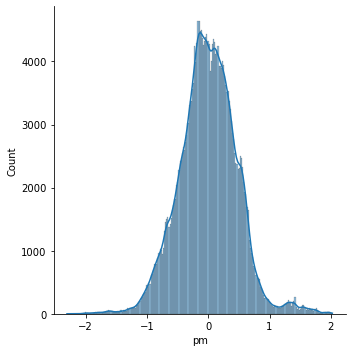

In [28]:
sns.displot(test_residuals,kde=True)


In [29]:
import statsmodels.api as sm

C:\Users\ABHIJIT KHILARI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


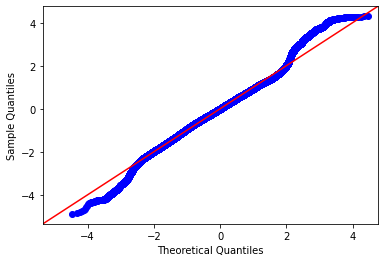

In [30]:
sm.qqplot(test_residuals,fit=True,line='45',marker="o") 
plt.show()

In [31]:
from scipy.stats import kstest
ks_test = kstest(test_residuals,"norm")
ks_test

KstestResult(statistic=0.19497033982820644, pvalue=0.0)

# #Using powerTransformer for data to try to behave like a Gaussian Distribution.

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [33]:
pt.fit(motor)

PowerTransformer()

In [34]:
pt.lambdas_

array([1.40190183, 0.52576752, 0.88321801, 0.85157388, 0.75330442,
       1.5533108 , 1.06687   , 0.98090021, 0.78615116])

In [35]:
motor_G=pd.DataFrame(pt.transform(motor))
motor_G.columns=motor.columns

In [36]:
motor_G.describe()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke
count,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05,8.882820e+05
mean,1.123934e-13,1.720951e-14,-1.179109e-15,6.900058e-16,-4.767850e-15,1.036004e-13,-7.951782e-16,-1.282164e-15,-6.056035e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.815857e+00,-1.882623e+00,-1.703404e+00,-1.989430e+00,-1.511422e+00,-2.322986e+00,-3.183261e+00,-2.074296e+00,-2.249723e+00
25%,-6.591567e-01,-9.298591e-01,-8.444059e-01,-9.427066e-01,-9.990111e-01,-8.641882e-01,-3.118736e-01,-7.022800e-01,-7.190219e-01
50%,1.206408e-01,9.749058e-03,3.046129e-01,-1.376141e-02,1.120012e-02,-1.796218e-02,-2.386726e-01,1.750944e-02,-4.730641e-02
75%,5.984807e-01,8.178888e-01,3.818420e-01,8.608291e-01,9.083349e-01,1.151920e+00,5.202671e-01,7.058711e-01,7.696164e-01
max,4.060450e+00,2.021342e+00,2.091773e+00,1.662691e+00,1.800701e+00,1.232552e+00,3.135526e+00,2.292614e+00,2.193611e+00


In [37]:
max_thershold=motor["pm"].quantile(0.9)
max_thershold

1.26312591

In [38]:
motor=motor[motor["pm"]<max_thershold]
motor.shape

(799453, 9)

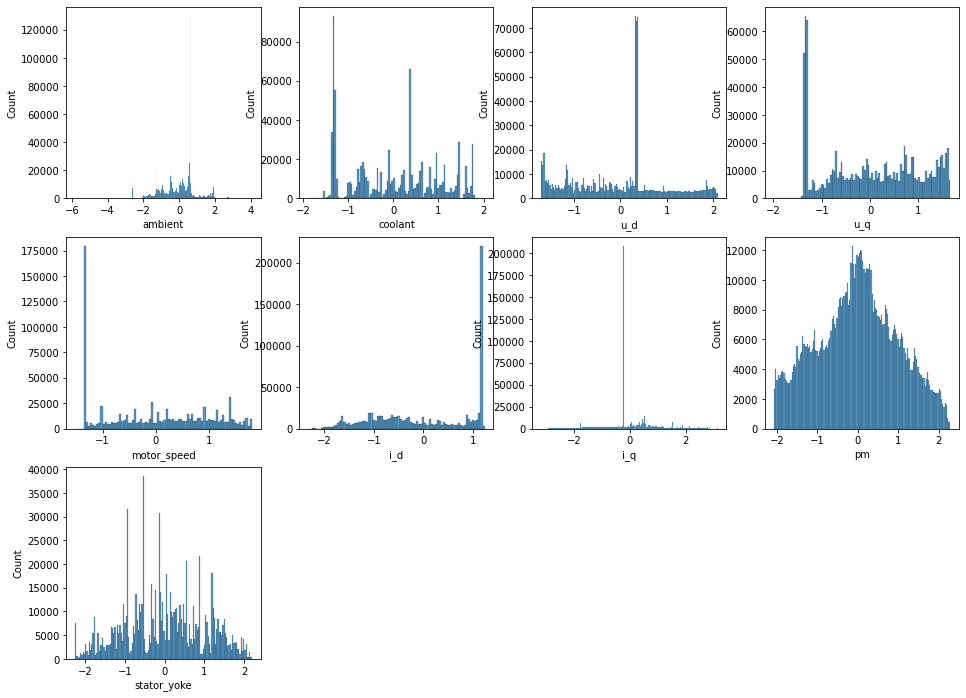

In [39]:
plt.figure(figsize=(16,12))
for i in range(len(motor_G.columns)):
    plt.subplot(3,4,i+1)
    sns.histplot(motor_G[motor_G.columns[i]])
plt.show()

In [40]:
X=motor_G.drop("pm",axis=1)
y=motor_G["pm"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [42]:
lr_G = LinearRegression()

In [43]:
lr_G.fit(X_train,y_train)

LinearRegression()

In [44]:
test_pred = lr_G.predict(X_test)

In [45]:
test_residuals_G = y_test - test_pred

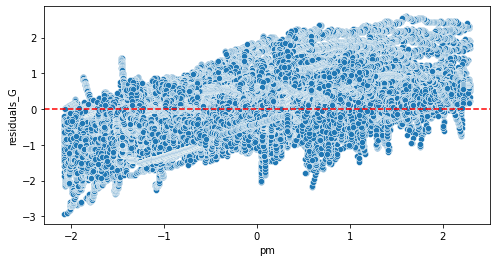

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=motor_G["pm"],y=test_residuals_G)
plt.xlabel("pm")
plt.ylabel("residuals_G")
plt.axhline(y=0, color='r', linestyle='--')

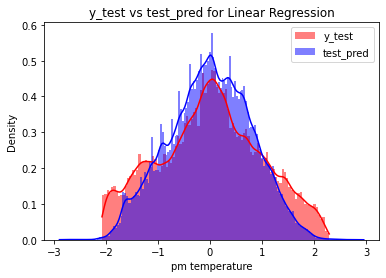

In [47]:
sns.histplot(y_test,color='red',kde=True,stat='density',lw=0,label="y_test")
sns.histplot(test_pred,color='blue',kde=True,stat='density',lw=0,label="test_pred")
plt.legend()
plt.title("y_test vs test_pred for Linear Regression")
plt.xlabel("pm temperature")
plt.show()

C:\Users\ABHIJIT KHILARI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


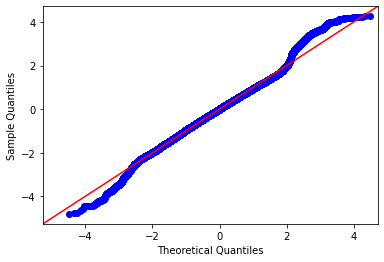

In [48]:
import statsmodels.api as sm
sm.qqplot(test_residuals_G,fit=True,line='45',marker="o") 
plt.show()

In [49]:
from scipy.stats import kstest
ks_test = kstest(test_residuals_G,"norm")
ks_test

KstestResult(statistic=0.1350874542824847, pvalue=0.0)

### As the plot fails to follow the 45 line at the extreme right that's why the residuals are not normally distributed.We have removed considerable outliers from the dataset and also tried to make the variables normally distributed,but none of that were successfull to convert the dataset into a Gaussian distribution).Therefore we conclude that the parametric models are not suitable.

# Hence now we will go for non-parametric models.

In [50]:
motor.describe()

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_yoke
count,799453.000000,799453.000000,799453.000000,799453.000000,799453.000000,799453.000000,799453.000000,799453.000000,799453.000000
mean,0.096369,0.050655,0.047329,0.002605,-0.031398,0.040215,-0.035052,0.026336,0.029388
std,0.838902,0.967455,0.992801,1.022230,0.989997,0.970839,0.995593,0.675061,0.892780
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.245874,-3.341639,-1.443534,-1.763960
25%,-0.386519,-0.803835,-0.756147,-1.037331,-0.995172,-0.691514,-0.324622,-0.466649,-0.647946
50%,0.313965,-0.114531,0.297099,-0.057670,-0.140246,0.236520,-0.245701,0.095514,-0.048777
75%,0.686605,0.611177,0.361728,0.879137,0.813881,1.024156,0.486921,0.530062,0.614033
max,2.665375,2.649032,2.274734,1.793498,2.024164,1.060255,2.914162,1.263125,2.416686


In [51]:
X=motor.drop("pm",axis=1)
y=motor["pm"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:

k_reg = KNeighborsRegressor()

k_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [55]:
k_reg.score(X_train,y_train)

0.9869842464879496

In [56]:
k_reg.score(X_test,y_test)

0.9768286930508437

In [57]:
test_pred_knn=k_reg.predict(X_test)

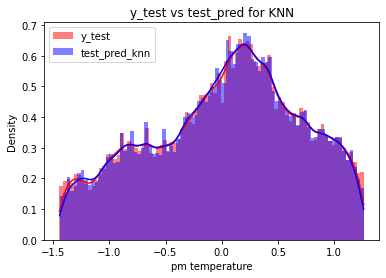

In [58]:
sns.histplot(y_test,color='red',kde=True,stat='density',lw=0,label="y_test")
sns.histplot(test_pred_knn,color='blue',kde=True,stat='density',lw=0,label="test_pred_knn")
plt.legend()
plt.title("y_test vs test_pred for KNN")
plt.xlabel("pm temperature")
plt.show()

In [59]:
MAE = mean_absolute_error(y_test,test_pred_knn)
MSE = mean_squared_error(y_test,test_pred_knn)
rmse_knn = np.sqrt(MSE)

In [60]:
rmse_knn

0.10278378887514471

In [61]:
r2_knn=r2_score(y_test,test_pred_knn)
r2_knn 

0.9768286930508437

97.68% of variation of data is explained by the Decision Tree model and rmse is 0.1169.

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt = DecisionTreeRegressor(random_state=45)

In [64]:
model_dt=dt.fit(X_train,y_train)

Feature: 0, Score: 0.14397
Feature: 1, Score: 0.17168
Feature: 2, Score: 0.03895
Feature: 3, Score: 0.03648
Feature: 4, Score: 0.03927
Feature: 5, Score: 0.04359
Feature: 6, Score: 0.06742
Feature: 7, Score: 0.45863


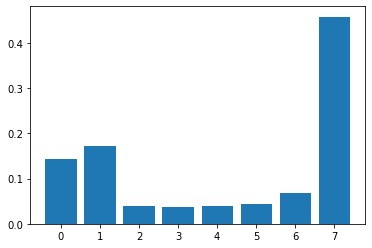

In [65]:
from matplotlib import pyplot

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [66]:
model_dt.score(X_train,y_train)

1.0

In [67]:
model_dt.score(X_test,y_test)

0.9916471250503034

In [68]:
y_pred_dt=model_dt.predict(X_test)

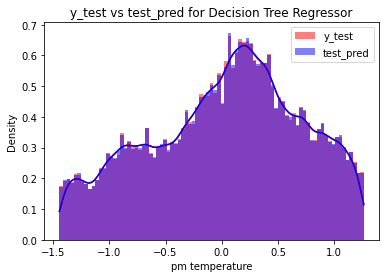

In [69]:
sns.histplot(y_test,color='red',kde=True,stat='density',lw=0,label="y_test")
sns.histplot(y_pred_dt,color='blue',kde=True,stat='density',lw=0,label="test_pred")
plt.legend()
plt.title("y_test vs test_pred for Decision Tree Regressor")
plt.xlabel("pm temperature")
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

In [71]:
rmse_dt

0.061711676872277445

In [72]:
from sklearn.metrics import r2_score
r2_dt=r2_score(y_test, y_pred_dt)
r2_dt

0.9916471250503034

In [73]:
rf = RandomForestRegressor(random_state=45)

In [74]:
model_rf=rf.fit(X_train,y_train)

Feature: 0, Score: 0.14333
Feature: 1, Score: 0.16704
Feature: 2, Score: 0.04045
Feature: 3, Score: 0.04092
Feature: 4, Score: 0.03810
Feature: 5, Score: 0.04187
Feature: 6, Score: 0.06620
Feature: 7, Score: 0.46210


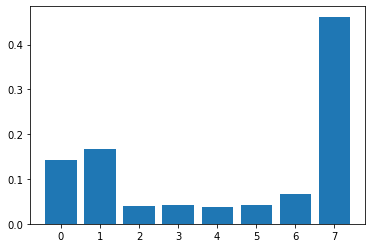

In [75]:
from matplotlib import pyplot

importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [76]:
model_rf.score(X_train,y_train)

0.9995185253102911

In [77]:
model_rf.score(X_test,y_test)

0.9965997667200989

In [78]:
y_pred_rf=model_rf.predict(X_test)

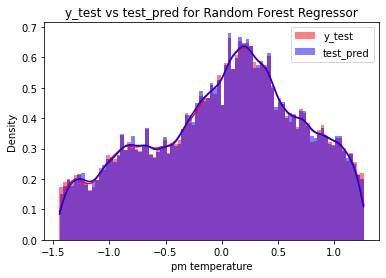

In [79]:
sns.histplot(y_test,color='red',kde=True,stat='density',lw=0,label="y_test")
sns.histplot(y_pred_rf,color='blue',kde=True,stat='density',lw=0,label="test_pred")
plt.legend()
plt.title("y_test vs test_pred for Random Forest Regressor")
plt.xlabel("pm temperature")
plt.show()

In [80]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [81]:
rmse_rf

0.039373472132795295

In [82]:
r2_rf=r2_score(y_test, y_pred_rf)
r2_rf

0.9965997667200989

r2_value for RandomForest is 0.997 and rmse for RandomForest is 0.0369.

In [83]:
models = pd.DataFrame({
    'MODELS': ['Linear Regression','K-Nearest Neighbours Regressor','Decision Tree Regressor','Random Forest Regressor'],
    'RMSE Score' : [rmse_lr, rmse_knn, rmse_dt, rmse_rf],
    'R^2 Score': [ r2_lr, r2_knn, r2_dt, r2_rf]
})

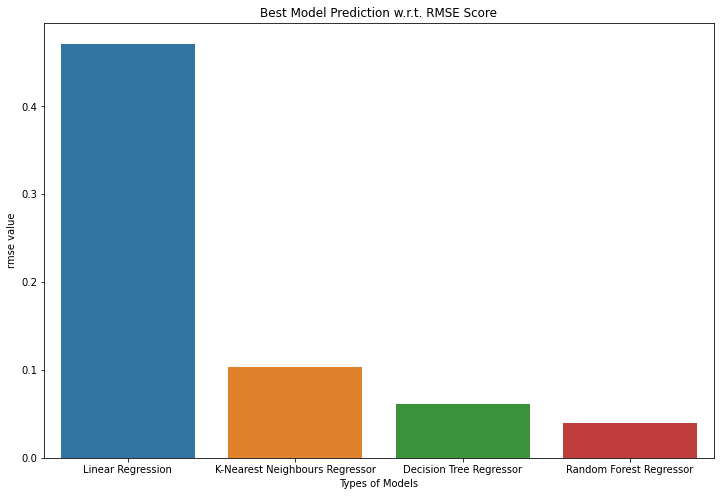

In [84]:
plt.figure(figsize=(12,8))
sns.barplot(x='MODELS',y='RMSE Score',data=models)
plt.title("Best Model Prediction w.r.t. RMSE Score") 
plt.xlabel("Types of Models")
plt.ylabel("rmse value")
plt.show()

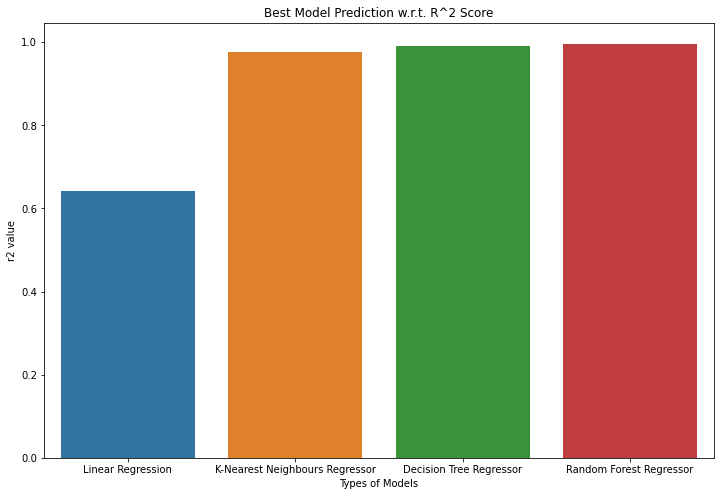

In [85]:
plt.figure(figsize=(12,8))
sns.barplot(x='MODELS',y='R^2 Score',data=models)
plt.title("Best Model Prediction w.r.t. R^2 Score") 
plt.xlabel("Types of Models")
plt.ylabel("r2 value")
plt.show()

From previous two graphs we can see that Random Forest Regressor is the best model for this dataset.